<a href="https://colab.research.google.com/github/Hamza-t/7-Days-of-Exploratory-Data-Analysis/blob/main/Five_Day_Daily_climate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Daily Climate time series

##Content
The Dataset is fully dedicated for the developers who want to train the model on Weather Forecasting for Indian climate. This dataset provides data from 1st January 2013 to 24th April 2017 in the city of Delhi, India. The 4 parameters here are
meantemp, humidity, wind_speed, meanpressure.

###Acknowledgements
This dataset has been collected from Weather Undergroud API. Dataset ownership and credit goes to them.

###Inspiration
This dataset was developed as a part Assignment 4 of Data Analytics Course, 2019 at PES University, Bangalore.

##Data info ::
####date : Date of format YYYY-MM-DD
####meantemp : Mean temperature averaged out from multiple 3 hour intervals in a day.
####humidity : Humidity value for the day (units are grams of water vapor per cubic meter volume of air).
####wind_speed : Wind speed measured in kmph
####meanpressure : Pressure reading of weather (measure in atm)

##Importing Liabraries

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
pip install calplot

In [ ]:
#for importing data (Kaggle)
import os
import opendatasets as od

#for stats and data cleaning
import pandas as pd
import numpy as np

#for data viz 
import seaborn as sns 
import matplotlib.pyplot as plt
import opendatasets as od
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline 
import calplot

In [ ]:
#Display all columns
pd.set_option("display.max_columns", None)

##Data Preparation and Cleaning
###Load the file using Pandas .
###Load the file using Pandas .
###Look at some information about the data & the columns
###Fix any missing or incorrect values

In [ ]:
#Connect with Kagle !
path="https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data"
od.download(path)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hamzarouaissi
Your Kaggle Key: ··········


100%|██████████| 22.0k/22.0k [00:00<00:00, 11.8MB/s]

In [ ]:
path_c= "./daily-climate-time-series-data"
os.listdir(path_c)

['DailyDelhiClimateTest.csv', 'DailyDelhiClimateTrain.csv']

In [ ]:
# Read the first file 
data0=pd.read_csv(path_c+"/DailyDelhiClimateTest.csv")
data0.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [ ]:
#Read the seconf file 
data=pd.read_csv(path_c+"/DailyDelhiClimateTrain.csv")
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
# We will work with  data 

In [ ]:
#Size and info of data
print(f"The size of data is {data.shape}")
print(30*"-")
print("the type of data")
data.dtypes

The size of data is (1462, 5)
------------------------------
the type of data


date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

##Data Cleaning

In [ ]:
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [ ]:
#duplicate rows 
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape[0])


number of duplicate rows:  0


In [ ]:
# Missing values 
print(data.isnull().sum())

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

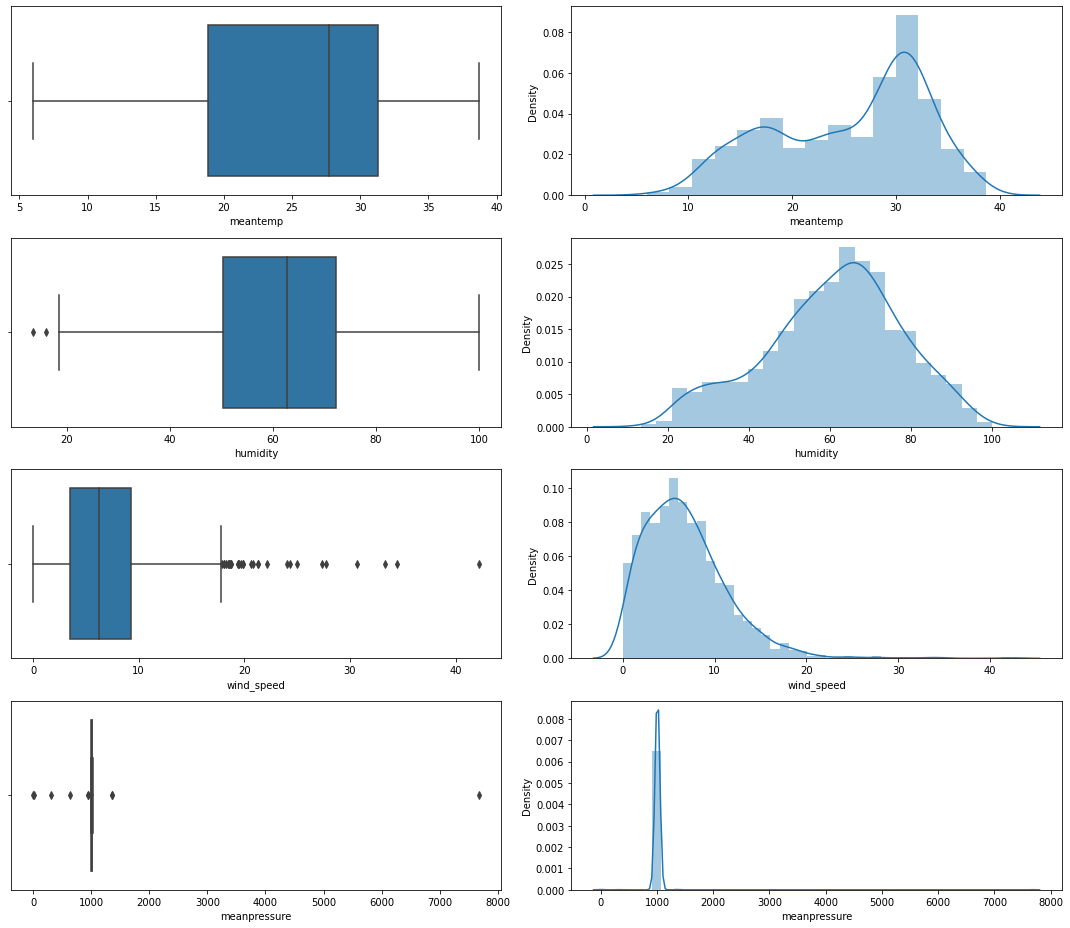

In [ ]:
# Detecting Outliers & Density  
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
liste=data [['meantemp','humidity','wind_speed','meanpressure']]
i,j=(0,0)
for t in liste:
  sns.boxplot(x=data[t] , ax=ax[i,j])
  j=j+1
  sns.distplot(data[t], ax = ax[i,j])
  i=i+1
  j=0
plt.tight_layout()

In [ ]:
print(data[data['meanpressure']>1500])

            date   meantemp  humidity  wind_speed  meanpressure
1182  2016-03-28  25.933333      52.8    6.546667   7679.333333


In [ ]:
data= data.drop([1182],axis=0)

In [ ]:
data['date']=pd.to_datetime(data['date'])

##Data analysis

###Average delhi temperature  Yearly

In [ ]:
data = data.set_index('date')

In [ ]:
data.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


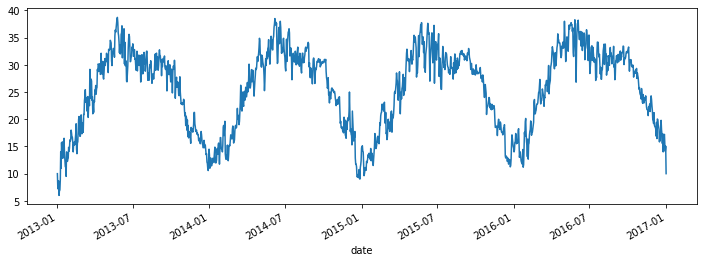

In [ ]:
data['meantemp'].plot(figsize=(12,4))

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


(<Figure size 900x612 with 6 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb17a601450>,
       dtype=object))

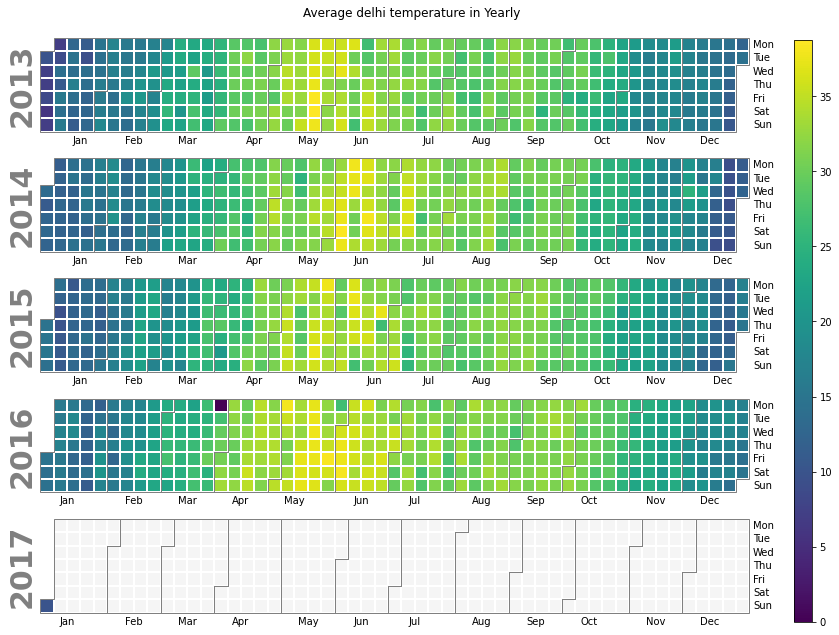

In [ ]:
calplot.calplot(data['meantemp'], suptitle='Average delhi temperature in Yearly')

###Average delhi humidity Yearly

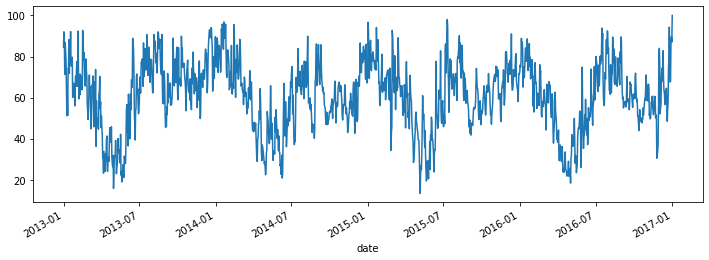

In [ ]:
data['humidity'].plot(figsize=(12,4))

(<Figure size 900x612 with 6 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb188b2e6d0>,
       dtype=object))

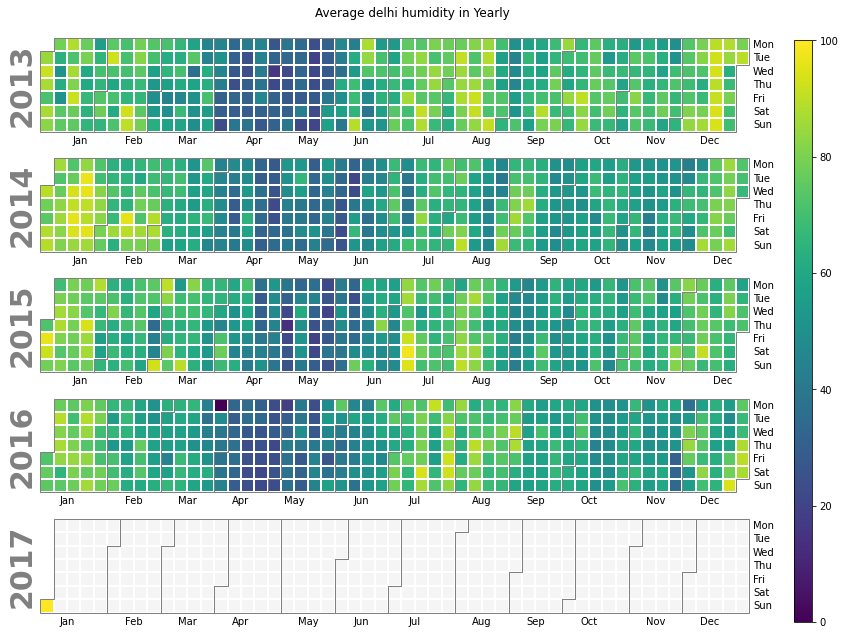

In [ ]:
calplot.calplot(data['humidity'], suptitle='Average delhi humidity in Yearly')

###Average delhi wind_speed  Yearly

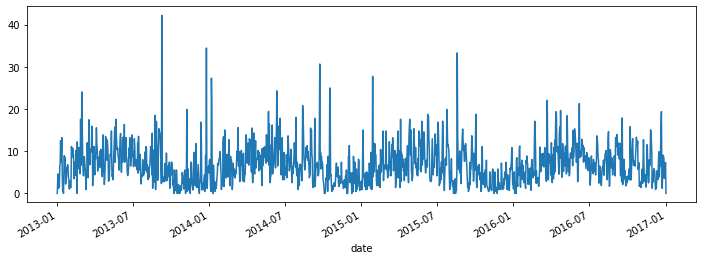

In [ ]:
data['wind_speed'].plot(figsize=(12,4))

(<Figure size 900x612 with 6 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb18557a290>,
       dtype=object))

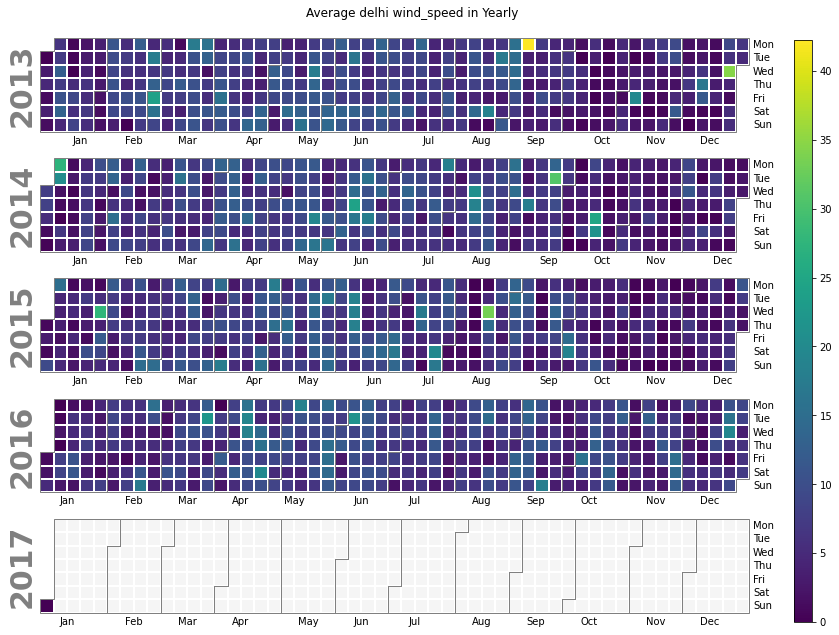

In [ ]:
calplot.calplot(data['wind_speed'], suptitle='Average delhi wind_speed in Yearly')

###Average delhi meanpressure Yearly 

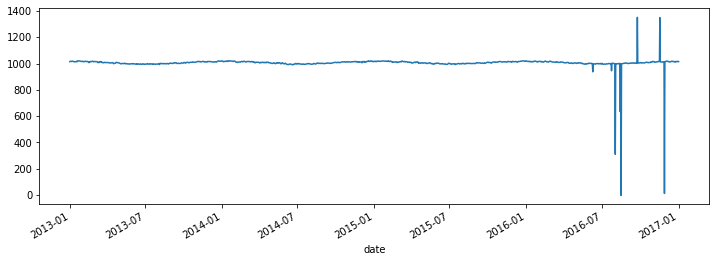

In [ ]:
data['meanpressure'].plot(figsize=(12,4))